In [1]:
import sys 
sys.path.append('..')

from lib.tab_exploration.tab_explorer import TabExplorer
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
np.random.seed(1)
%matplotlib inline

In [2]:
df = pd.read_csv('../data/titanic.csv')
df = (df.drop(['PassengerId', 'Survived', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1)
        .dropna(axis=0)
        .astype({'Pclass': object, 'Age': np.int32, 'Fare': np.float32}))
df.head()

,Pclass,Sex,Age,Fare,Embarked
0,3,male,22,7.250000,S
1,1,female,38,71.283302,C
2,3,female,26,7.925000,S
3,1,female,35,53.099998,S
4,3,male,35,8.050000,S


In [3]:
tsne = TSNE()
dbscan = DBSCAN(eps=1.0)
scaler = StandardScaler()

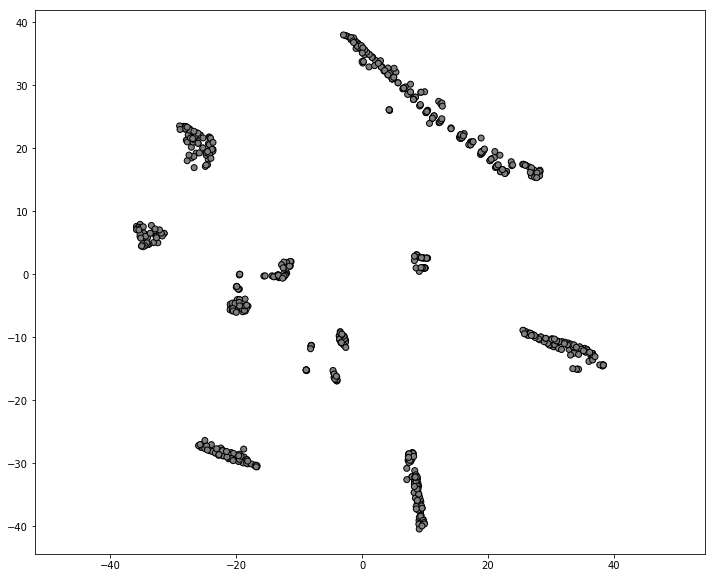

In [5]:
X = scaler.fit_transform(pd.get_dummies(df).values.astype(np.float32))
X_em = tsne.fit_transform(X)
clusters = dbscan.fit_predict(X)

tab_explorer = TabExplorer()
tab_explorer.fit(df, X_em, clusters)
fig, ax = tab_explorer.plot_static()